# The basics of making a sound... 
### (1) a sine wave: what does it mean ?  
### (2) time and frequency
### (3) making a sound
### (4) adding and concatenating
### (5) LOOKING at a sound: the Spectrogram
### (6) data: modulating amplitude with an envelope. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt # for plots
% matplotlib inline

import librosa

outfile_path = '../3_output_nogit/'

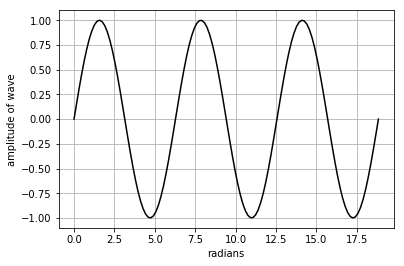

In [2]:
# (1) a sine wave: 
# way 1: numpy sin, in radians: a cycle is 2*pi-- this is GEOMETRY, not time ! 
# time is how fast it sweeps through that geometry ! 
# remember that the motion of a wave is not the motion of the particle ! 

pi  = np.pi 
npts_cycle = 40 # number of points per cycle, or samples per cycle
n_cycles = 3 
x = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y = np.sin(x)

plt.plot(x,y,'k') 
plt.xlabel('radians')
plt.ylabel('amplitude of wave')
plt.grid()

# notice that we did not use frequency here. 
# to convert to a sound, we need to assign time: how fast each cycle takes. 

## (2) time and frequency 

frequency =  440
duration =  2.0
dt =  5.681818181818182e-05
sampling frequency, fs =  17600
35200


(0, 0.006818181818181818)

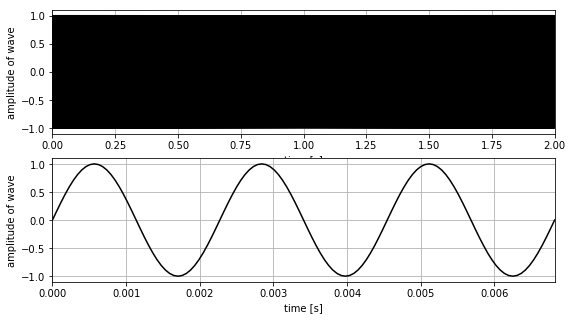

In [3]:
n_cycles = 880 
npts_cycle = 40

# note that this x does not have frequency in it ! 
x = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y = np.sin(x)

# frequency: 
f = 440 # Hz (cycles per second)
print('frequency = ', f)
time_per_cycle = period = p = 1/f # [seconds]
duration = n_cycles*period
print('duration = ', duration)

dt = 1/f/npts_cycle 
print('dt = ', dt)
# sampling frequency ! not the same as the wave frequency ! 
# must be at least 2x higher f than the highest frequency you want to hear
fs = int(1/dt) # fs must be an integer ! 
print('sampling frequency, fs = ', fs)

# calculate the time vector, just for plotting: 
# using linspace
time = np.linspace(0,period*n_cycles,len(x))
print(len(time))

# # using arange
# time = np.arange(0,(period*n_cycles),dt)
# print(len(time))

# Plot
plt.figure(figsize=(9,5))

plt.subplot(2,1,1)
plt.plot(time,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0.0, duration)


plt.subplot(2,1,2)
plt.plot(time,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
# just show a few cycles: 
plt.xlim(0, time_per_cycle*3)


## (3) MAKE A SOUND ! ! 

In [4]:
# name the file: 
outfile_name = 'sound_0.wav'

# call the wave file writing module in librosa: 
# y is the data, fs is the sampling frequency, 
# norm=False means the signal will not be normalized (default is True). 
# the a_scale scales the amplitude 

a_scale = 0.2
out = outfile_path + outfile_name
librosa.output.write_wav(out, y*a_scale, fs, norm=False)


## (4) adding and concatenating ! 

sound duration =  2.0
ratio of f2/f1 =  2.0
number of cycles of f1 =  880
number of cycles of f2 =  1760.0
35200


(0, 0.006818181818181818)

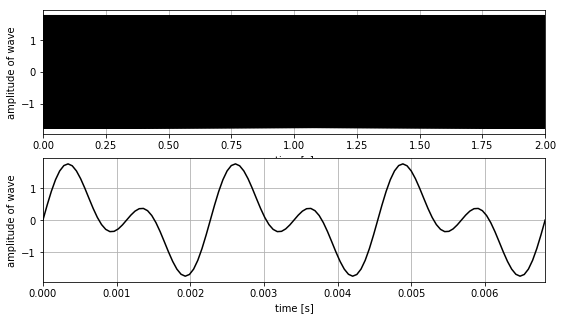

In [5]:
# adding waveforms/signals to make two frequencies
# make vectors of two frequencies, that have the same number of points, long enough to hear

n_cycles = 880
npts_cycle = 40
x1 = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y1 = np.sin(x1)

f1 = 440.
p1 = 1/f1
dt = p1/npts_cycle
# duration
dur1 = n_cycles*p1
print('sound duration = ', dur1)

f2 = 2*f1
p2 = 1/f2
n_cycles2 = dur1/p2 

print('ratio of f2/f1 = ', f2/f1)
print('number of cycles of f1 = ', n_cycles)
print('number of cycles of f2 = ', n_cycles2)

# make the same number of points 
x2 = np.linspace(0,2*pi*n_cycles2,len(x1))
y2 = np.sin(x2)

# add them together

y = y1+y2

time1 = np.linspace(0,p1*n_cycles,len(x1))
print(len(time1))

# plot the wave
plt.figure(figsize=(9,5))
plt.subplot(2,1,1)
plt.plot(time1,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0, dur1)

plt.subplot(2,1,2)
plt.plot(time1,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0, p1*3)


In [6]:
# write the sound: 
outfile = 'sound_addition.wav'
out = outfile_path + outfile
fs = int(1/dt) # must be an integer ! 
a_scale = 0.2
librosa.output.write_wav(out, y*a_scale, fs, norm=False)

In [7]:
# concatenating
outfile = 'sound_concat.wav'
out = outfile_path + outfile

print(y2.shape)
# stick 2 at the end of 1 : 
yc = np.concatenate((y1,y2),axis=0)

fs = int(1/dt) # must be an integer ! 
librosa.output.write_wav(out, yc, fs, norm=False)

(35200,)


## (5) Looking at the sound: The Fourier Transform ! 

(0, 2933.3333333333335)

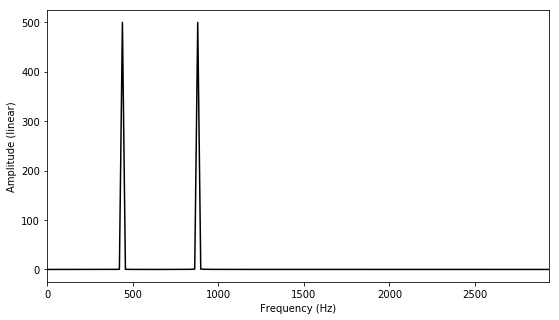

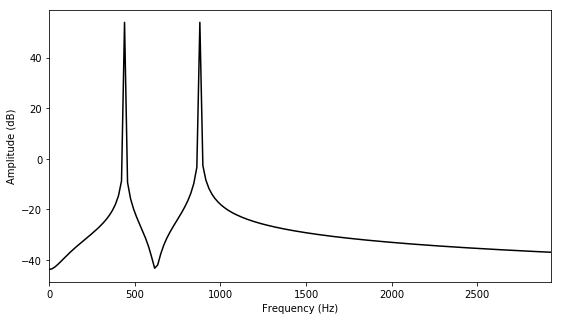

In [8]:
from scipy import fftpack as spfft # for computing spectra
#from scipy import signal as spsig

########## First do the Fourier transform = look at the frequency content of the entire signal
# We do a fast Fourier transform (FFT)

Nfft = 1000 # Number of points (discrete frequencies) on which to compute the FFT 
# (actually twice the number of frequency point we need, but that's another story). Better if it's a power of 2
f = np.arange(-Nfft/2,Nfft/2,1)*fs/Nfft 
# the discretized vector of frequencies: contains negative and positive frequencies 
# (see mathematical definition of the Fourier transform)

# FFT computation -> gives the spectrum S
S = spfft.fft(y, n=Nfft)
# S is an array of complex numbers, containing the amplitude for each frequency bin in f, but in another order... 
# First positive frequency bins, then negative frequency bins...

# Let's consider only positive frequencies
f = f[int(len(f)/2):] 
S = S[:int(len(S)/2)] 
# Now f covers the (discretized) frequency range from 0 to sr/2 Hz (see Nyquist theorem, Nyquist frequency)

########## Finally plot the spectrum
plt.figure(figsize=(9,5))
plt.plot(f,np.absolute(S),'k') # Since S is complex-valued, we have to choose between the absolute value and phase
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (linear)')
plt.xlim([0,fs/6])

plt.figure(figsize=(9,5))
plt.plot(f,20*np.log10(np.absolute(S)),'k') # Take the log10 with numpy, and have a factor 20 because we're dealing with acoustic pressure (L = 20log10(p/pref)) and not intensity (L = 10log10(p/pref))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim([0,fs/6])

## (5) Looking at the sound: The Spectrogram ! 

The "problem" with FFT is that it averages the frequency content over the whole signal. We completely lose the 
information of time.

so... Short Term Fourier Transform (STFT).

The idea is to cut the signal into successive time frames and perform an FFT for each frame
Involves quite a bit of mathematical stuff which we will ingeniously skip here...

See here for a graphical explanation https://www.researchgate.net/figure/231828310_fig7_Figure-7-Short-time-Fourier-transform-STFT-with-envelope-and-two-sample-overlap

And the well-known "spectrogram" is only a graphical representation of the STFT. 

sampling frequency fs = 17600
number of samples = 35200
sound duration = 2.0
window duration in seconds: 0.2
window length in samples: 3520
7040
(3521, 19)


Text(0,0.5,'dB')

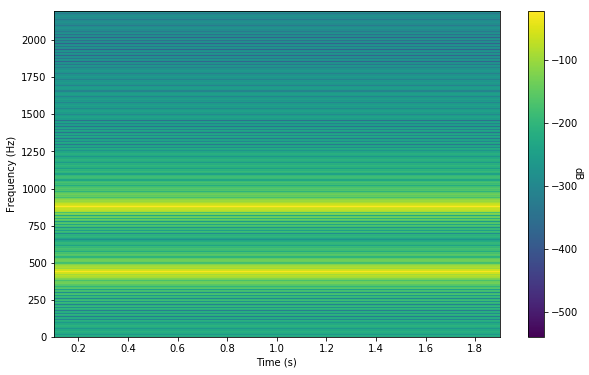

In [9]:
from scipy import signal as spsig

# SPECTROGRAM !
# first compute the short time fourier transform STFT
# "Uncertainty Principle": there is a direct tradeoff between resolution in frequency and in time: 
# that is governed by the window length NfftSTFT

# for the full signal spectra, the Nfft (number of frequencies was simply the length of the signal. 
# instead calculate Nfft upward from the sampling frequency and then window time? 
# 
data = y
print('sampling frequency fs = ' + str(fs))
print('number of samples = ' + str(len(data)))
duration = len(data)/fs
print('sound duration = ' + str(duration))
numwindows = 10
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# This changes the total number of windows, but has to be smaller than the window length (in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)
#print(fSTFT.shape)
#print(tSTFT.shape)


# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

## (6) modulate the amplitude with an envelope ! 

(35200,)
5866
(5866,)
(29334,)


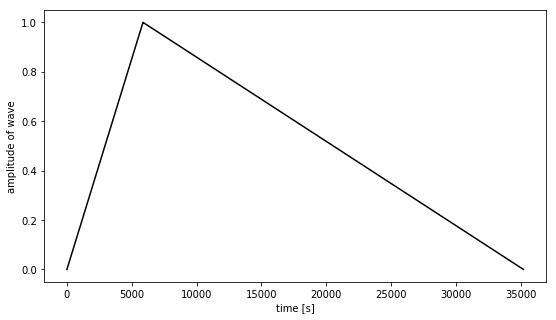

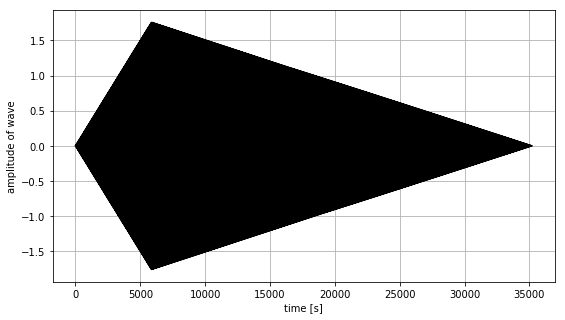

In [10]:
# 1) make a curve that will be the envelope, of the same length as the original signal
N = len(y)
envelope = np.zeros(N)
print(envelope.shape)
peak = int(N/6)
print(peak)

# from 0 to the peak index (peak):
up = np.linspace(0,1,peak)
print(up.shape)
envelope[:peak] = up

# and fill in the rest: 
down = np.linspace(1,0,(N-peak))
print(down.shape)
envelope[peak:] = down

# plot the envelope
plt.figure(figsize=(9,5))
plt.plot(envelope,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')

# modulate the signal by multiplication
ym = y*envelope

# plot the wave
plt.figure(figsize=(9,5))
plt.plot(ym,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()

# make the sound
outfile = 'sound_env.wav'
out = outfile_path + outfile
fs = int(1/dt) # must be an integer ! 
a_scale = 0.9
librosa.output.write_wav(outfile, ym*a_scale, fs, norm=False)

## (7) PLOT THE SPECTROGRAM OF THE envelope modulated signal

sampling frequency fs = 17600
number of samples = 35200
sound duration = 2.0
window duration in seconds: 0.05
window length in samples: 880
1760
(881, 79)


Text(0,0.5,'dB')

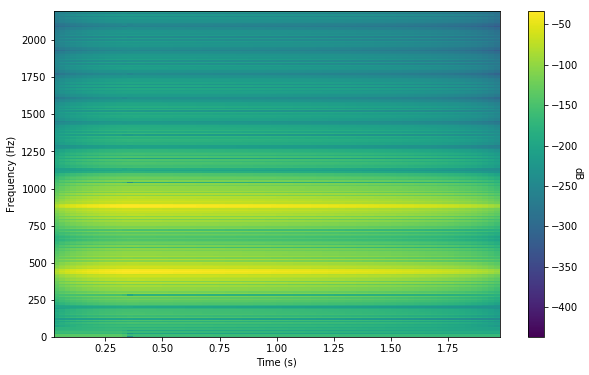

In [11]:
from scipy import signal as spsig

data = ym
print('sampling frequency fs = ' + str(fs))
print('number of samples = ' + str(len(data)))
duration = len(data)/fs
print('sound duration = ' + str(duration))
numwindows = 40 # now we need better time resolution ! 
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# This changes the total number of windows, but has to be smaller than the window length (in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

## Play: 
### for example: make some beeps with different frequency ratios  (build added oscillators, then multiply them by envelopes, then concatenate those...)